In [1]:
%matplotlib inline
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model,Sequential
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
filepath = "C:/Users/Bin/Documents/dataset1010/dataset/dataset1010"
data = pd.read_csv(filepath,header=None,usecols=range(1,10,1))
dataset = data.values  # convert dataframe to np.ndarray

#Scaling
scaler = MinMaxScaler()
scaler.fit(dataset)
s_dataset = scaler.transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(s_dataset) * 0.67)
test_size = len(s_dataset) - train_size
train, test = s_dataset[0:train_size,:], s_dataset[train_size:len(s_dataset),:]
print(len(train), len(test))

13424 6612


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, timestep=1):
    dataX = []
    for i in range(len(dataset)-timestep+1):
        a = dataset[i:(i+timestep), :]
        dataX.append(a)
    return np.array(dataX)# convert an array of values into a dataset matrix
trainX, testX = create_dataset(train,10),create_dataset(test,10)

In [8]:
trainX.shape

(13415, 10, 9)

In [9]:
timesteps = 30
input_dim = data.shape[1]
latent_dim = 3
n_epoch = 30
n_batch = 10

In [13]:
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

x_train = data.iloc[:15000,:]
X = pd.DataFrame.as_matrix(x_train)
X = s_dataset[:15000]
T = s_dataset[15000:18000]
X = np.reshape(X,(500,30,input_dim)) #reshape(samples,timesteps,dim)
T = np.reshape(T,(100,30,input_dim))
history = sequence_autoencoder.fit(X,X,
                epochs=100,
                batch_size=100,
                validation_data=(T,T))

Train on 500 samples, validate on 100 samples
Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 0.1855 - val_loss: 0.1798
Epoch 2/100
500/500 [==============================] - 0s 313us/step - loss: 0.1786 - val_loss: 0.1731
Epoch 3/100
500/500 [==============================] - 0s 344us/step - loss: 0.1720 - val_loss: 0.1666
Epoch 4/100
500/500 [==============================] - 0s 313us/step - loss: 0.1655 - val_loss: 0.1602
Epoch 5/100
500/500 [==============================] - 0s 281us/step - loss: 0.1592 - val_loss: 0.1539
Epoch 6/100
500/500 [==============================] - 0s 313us/step - loss: 0.1528 - val_loss: 0.1474
Epoch 7/100
500/500 [==============================] - 0s 313us/step - loss: 0.1462 - val_loss: 0.1407
Epoch 8/100
500/500 [==============================] - 0s 281us/step - loss: 0.1394 - val_loss: 0.1336
Epoch 9/100
500/500 [==============================] - 0s 313us/step - loss: 0.1321 - val_loss: 0.1260
Epoch 10/100
500/500 [=======

500/500 [==============================] - ETA: 0s - loss: 0.008 - 0s 375us/step - loss: 0.0085 - val_loss: 0.0074
Epoch 80/100
500/500 [==============================] - 0s 313us/step - loss: 0.0084 - val_loss: 0.0073
Epoch 81/100
500/500 [==============================] - 0s 313us/step - loss: 0.0083 - val_loss: 0.0072
Epoch 82/100
500/500 [==============================] - 0s 313us/step - loss: 0.0082 - val_loss: 0.0071
Epoch 83/100
500/500 [==============================] - 0s 250us/step - loss: 0.0081 - val_loss: 0.0070
Epoch 84/100
500/500 [==============================] - 0s 250us/step - loss: 0.0080 - val_loss: 0.0069
Epoch 85/100
500/500 [==============================] - 0s 250us/step - loss: 0.0079 - val_loss: 0.0069
Epoch 86/100
500/500 [==============================] - 0s 250us/step - loss: 0.0078 - val_loss: 0.0068
Epoch 87/100
500/500 [==============================] - 0s 250us/step - loss: 0.0078 - val_loss: 0.0067
Epoch 88/100
500/500 [==============================]

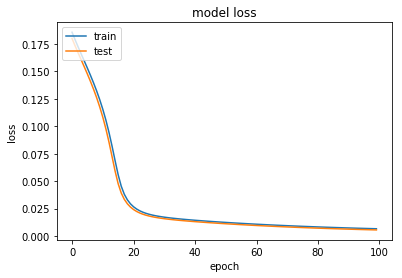

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

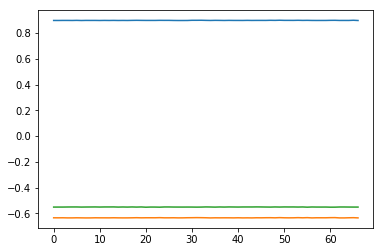

In [26]:
import math
test = s_dataset[18000:]
sample_num = math.floor(test.shape[0]/30)

x_test = np.reshape(test[:sample_num*30],(sample_num,30,input_dim))
foo = encoder.predict(x_test)
#bar = sequence_autoencoder.predict(test)
#bar_r = np.reshape(bar,(6000,input_dim))
#y = pd.DataFrame(bar_r)
#y.iloc[:,6:].plot()
plt.plot(foo)

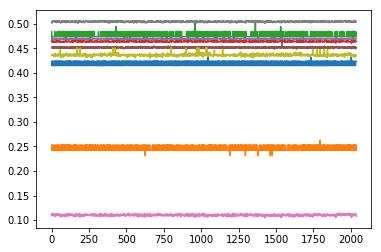

In [27]:
plt.plot(test)